## Using Standard optimization methods to get the parameter values

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
force1=pd.read_excel('ForceData_1.xlsx')

In [7]:
#import numpy as np
from scipy.optimize import minimize
#from sklearn.linear_model import LinearRegression

# Define the Zener-Hollomon flow stress curve equation
def zener_hollomon(c1, c2, c3, c4, strain_rate, RT, strain):
    #RT = temperature * 8.314  # assuming gas constant R = 8.314 J/(mol*K)
    return c1 * np.exp(c2 * RT) * (strain ** c3) * (strain_rate ** c4)

# Define the objective function to minimize (using mean squared error)
def objective_function(coef, strain_rate,RT, strain, measured_values):
    predicted_values = zener_hollomon(coef[0], coef[1], coef[2], coef[3], strain_rate, RT, strain)
    return np.mean((predicted_values - measured_values) ** 2)

strain = force1['Strain']
strain_rate = force1['Strain Rate']
RT= force1['1/RT']
measured_values = force1['Meas FS (ksi)']

# Initial guess for coefficients
initial_guess = np.array([1.0,1.0,1.0, 1.0])

# Bounds for coefficients
#bounds = [(0, None), (-10, 10), (0, None), (0, None)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(strain_rate, RT, strain, measured_values))

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values = zener_hollomon(optimized_coefs[0], optimized_coefs[1], optimized_coefs[2], optimized_coefs[3], strain_rate, RT, strain)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values, predicted_values))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values, predicted_values)
print("R^2:", r2)


Optimized coefficients: [ 1.49163817e+00  2.56530949e+04 -1.43852960e-01  3.66432305e-01]
RMSE: 6.537023271781525
R^2: 0.8923824596690308


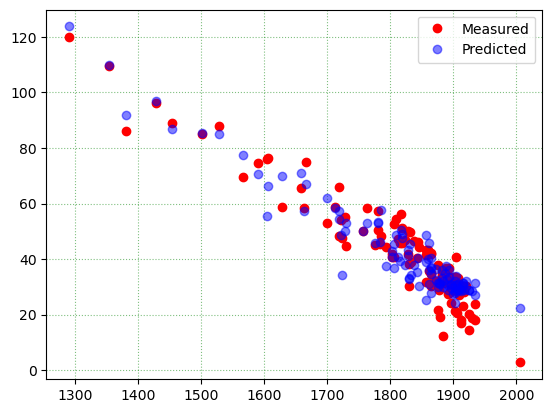

In [5]:
plt.plot(force1['Core Temp (F)'],force1['Meas FS (ksi)'],'ro',label='Measured')
plt.plot(force1['Core Temp (F)'],predicted_values,'bo', label='Predicted',alpha=0.5)

plt.grid(color='g', ls=':', alpha=0.5)
#plt.title('Using Linear Regression, $R^2:92\%$')
plt.legend()
plt.show()

## Divide the data into regions

#### Region 1 : >1800F

#### Region 2 : >1550F

#### Region 3 : <1550F

In [8]:
region1 = force1.loc[force1['Core Temp (F)']>1800]
region2 = force1.loc[force1['Core Temp (F)']>1550]
region3 = force1.loc[force1['Core Temp (F)']<1550]

### Region 1

In [10]:
strain = region1['Strain']
strain_rate = region1['Strain Rate']
RT= region1['1/RT']
measured_values1 = region1['Meas FS (ksi)']

# Initial guess for coefficients
initial_guess = np.array([1.0,1.0,1.0, 1.0])

# Bounds for coefficients
#bounds = [(0, None), (-10, 10), (0, None), (0, None)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(strain_rate, RT, strain, measured_values1))

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values1 = zener_hollomon(optimized_coefs[0], optimized_coefs[1], optimized_coefs[2], optimized_coefs[3], strain_rate, RT, strain)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values1, predicted_values1))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values1, predicted_values1)
print("R^2:", r2)


Optimized coefficients: [ 1.97184862e-03  9.85355511e+04 -1.11802245e-01  2.89799474e-01]
RMSE: 5.26394160301146
R^2: 0.7395124414790653


## Region 2

In [11]:
strain = region2['Strain']
strain_rate = region2['Strain Rate']
RT= region2['1/RT']
measured_values2 = region2['Meas FS (ksi)']

# Initial guess for coefficients
initial_guess = np.array([1.0,1.0,1.0, 1.0])

# Bounds for coefficients
#bounds = [(0, None), (-10, 10), (0, None), (0, None)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(strain_rate, RT, strain, measured_values2))

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values2 = zener_hollomon(optimized_coefs[0], optimized_coefs[1], optimized_coefs[2], optimized_coefs[3], strain_rate, RT, strain)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values2, predicted_values2))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values2, predicted_values2)
print("R^2:", r2)


Optimized coefficients: [ 4.93499071e-01  3.96340598e+04 -1.01683013e-01  2.76780748e-01]
RMSE: 6.513012323934753
R^2: 0.7959279391421277


## Region 3

In [12]:
strain = region3['Strain']
strain_rate = region3['Strain Rate']
RT= region3['1/RT']
measured_values3 = region3['Meas FS (ksi)']

# Initial guess for coefficients
initial_guess = np.array([1.0,1.0,1.0, 1.0])

# Bounds for coefficients
#bounds = [(0, None), (-10, 10), (0, None), (0, None)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(strain_rate, RT, strain, measured_values3))

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values3 = zener_hollomon(optimized_coefs[0], optimized_coefs[1], optimized_coefs[2], optimized_coefs[3], strain_rate, RT, strain)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values3, predicted_values3))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values3, predicted_values3)
print("R^2:", r2)


Optimized coefficients: [ 1.44759095e+00  2.10805710e+04 -2.25364313e-01  5.13173062e-01]
RMSE: 1.7023197275000646
R^2: 0.9813452654601164


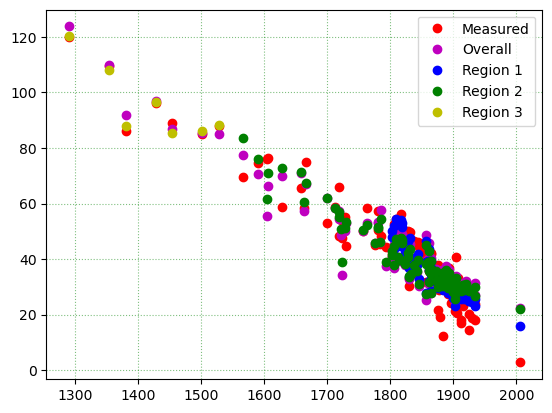

In [13]:
plt.plot(force1['Core Temp (F)'],force1['Meas FS (ksi)'],'ro',label='Measured')
plt.plot(force1['Core Temp (F)'],predicted_values,'mo', label='Overall')
plt.plot(region1['Core Temp (F)'],predicted_values1,'bo', label='Region 1')
plt.plot(region2['Core Temp (F)'],predicted_values2,'go', label='Region 2')
plt.plot(region3['Core Temp (F)'],predicted_values3,'yo', label='Region 3')


plt.grid(color='g', ls=':', alpha=0.5)
plt.legend()
plt.show()